<a href="https://colab.research.google.com/github/dyugong/Data_Science_Basic/blob/main/roulette_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
number = np.append( make_array('0', '00'), np.arange(1, 37, 1))
number.size

38

In [ ]:
###
color = make_array('green', 'green')
for i in range(18):
  color = np.append(color, ['red','black'])

color

array(['green', 'green', 'red', 'black', 'red', 'black', 'red', 'black',
       'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black',
       'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black',
       'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black',
       'red', 'black', 'red', 'black', 'red', 'black'],
      dtype='<U5')

In [ ]:
wheel = Table().with_columns(
'Pocket', number,
'Color', color
)

In [ ]:
def red_winnings(color):
  if color == 'red':
    return 1
  else:
    return -1

In [ ]:
####
wheel.apply(red_winnings, 'Color')

array([-1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1])

In [ ]:
bets = wheel.with_column(
'Winnings: Red', wheel.apply(red_winnings, 'Color')
)
bets

Pocket,Color,Winnings: Red
0,green,-1
00,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [ ]:
one_spin = bets.sample(3)
one_spin

Pocket,Color,Winnings: Red
24,black,-1
35,red,1
1,red,1


In [ ]:
spin = bets.sample(10)
spin.column("Color").item(0)


'red'

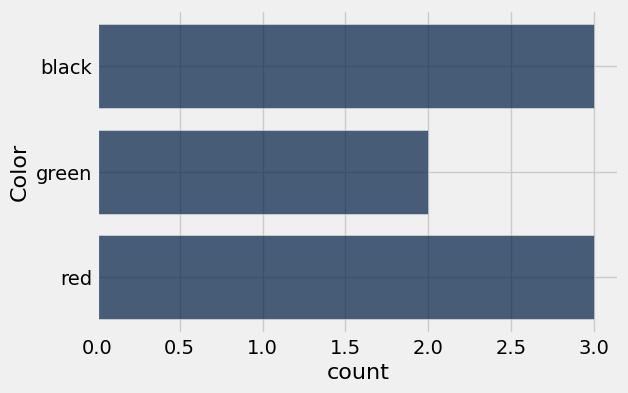

In [ ]:
ar = ['red','red','red','black','black','black','green','green']
Table().with_column('Color', ar).group('Color').barh('Color')

In [ ]:
#Table().with_column('Winnings: Red', winnings_on_red).group('Winnings: Red').barh('Winnings: Red')

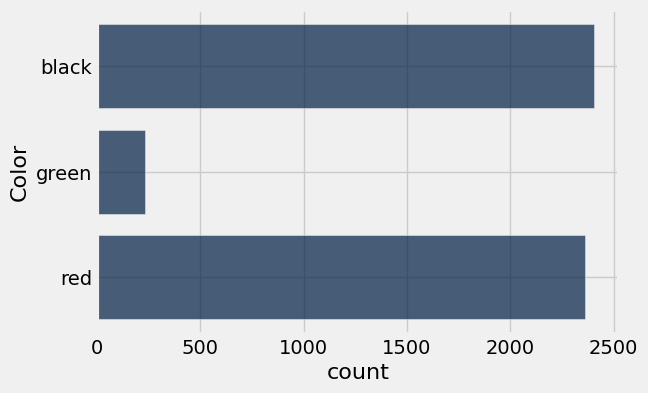

In [ ]:
num_simulations = 5000
colors = make_array()
winnings_on_red = make_array()
for i in np.arange(num_simulations):
  spin = bets.sample(1)
  new_color = spin.column("Color").item(0)
  colors = np.append(colors, new_color)
  new_winnings = spin.column('Winnings: Red')
  winnings_on_red = np.append(winnings_on_red, new_winnings)


Table().with_column('Color', colors).group('Color').barh('Color')

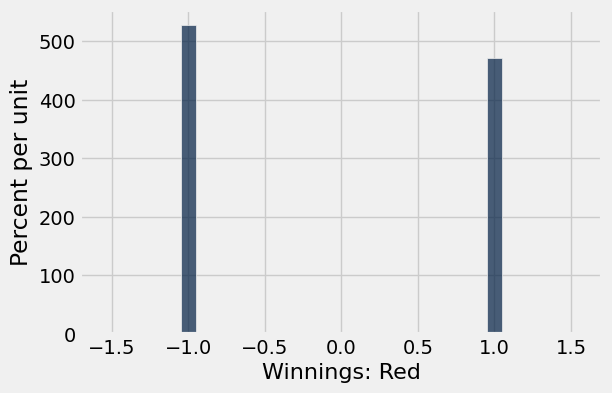

In [ ]:
Table().with_column('Winnings: Red', winnings_on_red).hist(bins = np.arange(-1.55, 1.65, .1))
#Table().with_column('Winnings: Red', winnings_on_red).hist()

In [ ]:
spins = bets.sample(200)
spins.column('Winnings: Red').sum()

18

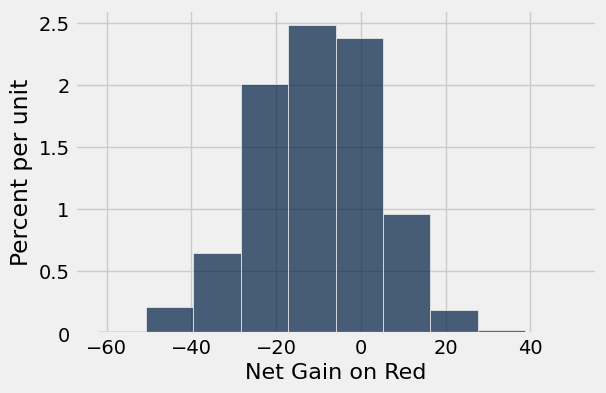

In [ ]:
num_spins = 200
net_gain = make_array()
for i in np.arange(num_simulations):
  spins = bets.sample(num_spins)
  new_net_gain = spins.column('Winnings: Red').sum()
  net_gain = np.append(net_gain, new_net_gain)

Table().with_column('Net Gain on Red', net_gain).hist()

In [ ]:
def split_winnings(pocket):
  if pocket == '0':
    return 17
  elif pocket == '00':
    return 17
  else:
    return -1

In [ ]:
more_bets = wheel.with_columns(
'Winnings: Red', wheel.apply(red_winnings, 'Color'),
'Winnings: Split', wheel.apply(split_winnings, 'Pocket')
)
more_bets

Pocket,Color,Winnings: Red,Winnings: Split
0,green,-1,17
00,green,-1,17
1,red,1,-1
2,black,-1,-1
3,red,1,-1
4,black,-1,-1
5,red,1,-1
6,black,-1,-1
7,red,1,-1
8,black,-1,-1


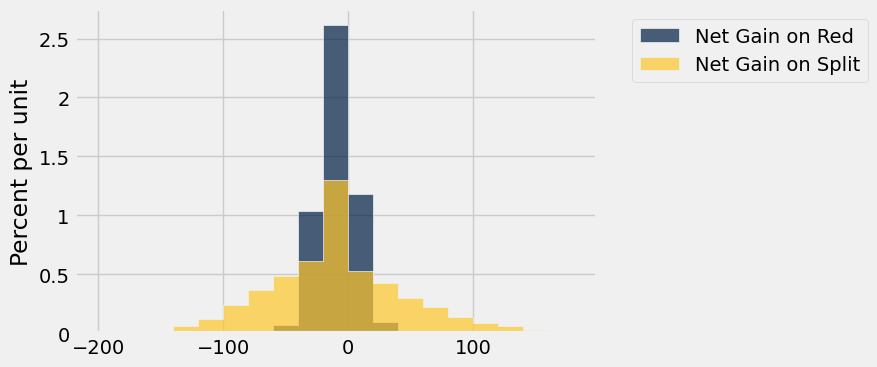

In [ ]:
net_gain_red = make_array()
net_gain_split = make_array()
for i in np.arange(num_simulations):
  spins = more_bets.sample(num_spins)
  new_net_gain_red = spins.column('Winnings: Red').sum()
  net_gain_red = np.append(net_gain_red, new_net_gain_red)
  new_net_gain_split = spins.column('Winnings: Split').sum()
  net_gain_split = np.append(net_gain_split, new_net_gain_split)

Table().with_columns(
'Net Gain on Red', net_gain_red,
'Net Gain on Split', net_gain_split
).hist(bins=np.arange(-200, 200, 20))

#로또 추첨 시뮬레이션

우리나라에서 매주 판매되는 로또는 평균 몇장일까요?
가장 많이 판매되었던 주(week)와 가장 적게 판매되었던 주(week)에는 몇장이 판매되었을까요?
로또 추첨 결과 매주 1등 당첨자가 다수 나오고 있습니다.
이런 당첨 확률이 과연 타당한 것일까요?

자!~~~~ 이 질문에 대해 데이터과학의 관점에서 한번 분석을 해 봅시다.

그래서, 로또 시뮬레이션을 해봅시다.

**어떻게 프로그램을 구성하는 것이 타당할까를 먼저 구상해서 아이디어를 제시**해 봅시다.

**참고로 로또는 45개 숫자중 순서에 관계없이 6개 숫자가 일치하면 1등으로 당첨된다.**

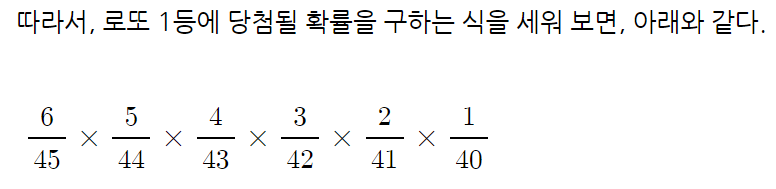

위 식을 계산하면

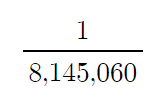

이 나온다.!

실제로 우리 국민들이 매주 즐겨하는 로또의 경우, 지난해 하루평균 130억 원치 팔렸다는 조사도 나왔다. 기획재정부가 14일 밝힌 자료에 의하면 로또의 판매량은 하루 평균 1,297만여 건으로, 금액으로 환산하면 총 130억 원이나 된다


2018년 109억원, 2019년 118억원으로 일평균 판매액은 계속 증가했다. 그러다가 지난해 크리스마스 연휴가 있는 943회차(12월20~26일·잠정치)에서 전체 판매액은 1001억원이었고, 판매량은 1억8만1432건이었다. 온라인복권(로또) 주간 판매액이 9년 만에 1000억원을 넘어선 것이다. 가장 최근 기록은 2011년 10월(1268억원)이다.

2021.01.14 기사

출처 : 중앙뉴스(http://www.ejanews.co.kr)